In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
# here we are working on Tensorflow version 2.1.0 so we need to write tensorflow.keras.
#keras is in built function in Tensorflow.
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image

In [4]:
train_location = "/content/drive/MyDrive/Colab Notebooks/Diabetic Retenopathy/Final/New Dataset"
test_location = "/content/drive/MyDrive/Colab Notebooks/Diabetic Retenopathy/Final/New Dataset"
filepath = '/content/drive/MyDrive/Colab Notebooks/Diabetic Retenopathy/Model/F_model_VGG16.keras'

In [5]:
from tensorflow.keras.models import load_model
Detection=load_model(filepath)

In [6]:
img_size=224
batch_size=10
num_class=5

In [7]:
# Complete Dataset images can be loaded using ImageDataGenerator function

datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory(train_location,target_size=(img_size,img_size),batch_size=batch_size,class_mode='categorical',shuffle=True)

datagen_test=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_test.flow_from_directory(test_location,target_size=(img_size,img_size),batch_size=batch_size,class_mode='categorical',shuffle=True)


Found 530 images belonging to 5 classes.
Found 530 images belonging to 5 classes.


In [8]:
classes=train_generator.class_indices
classes

{'Error': 0, 'Exudate': 1, 'Healthy': 2, 'Hemorrhage': 3, 'MA': 4}

In [10]:
category=[]
for i in classes:
          category.append(i)

category

['Error', 'Exudate', 'Healthy', 'Hemorrhage', 'MA']

In [13]:
from skimage import io
import os
from tensorflow.keras.preprocessing import image

image_directory=test_location
dataset = []
predict_result=[]
label =[]


my_folders = os.listdir(image_directory)
for i, folder_name in enumerate(my_folders):
    #print(str(i)+': ' +folder_name)

    loc=0
    for j in category:
      if(j==folder_name):
        lab=loc
      loc+=1
    lab

    my_images = os.listdir(image_directory+'/'+folder_name)
    for j,image_name in enumerate(my_images):
      #print(str(j)+': ' +image_name)

      file_name = image_directory+'/'+folder_name + '/' + image_name

      test_img=image.load_img(file_name,target_size=(img_size,img_size))
      test_img=image.img_to_array(test_img)
      test_img=np.expand_dims(test_img,axis=0)
      result=Detection.predict(test_img)

      label.append(lab)
      predict_result.append(result.argmax())

      print(f'{image_name}: {folder_name} : {str(lab)} , Predicted : {result.argmax()}  ')




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
ma1.jpg: MA : 4 , Predicted : 4  
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step
ma2.jpg: MA : 4 , Predicted : 4  
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
ma3.jpg: MA : 4 , Predicted : 4  
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step
ma4.jpg: MA : 4 , Predicted : 4  
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step
ma5.jpg: MA : 4 , Predicted : 4  
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step
ma6.jpg: MA : 4 , Predicted : 4  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
ma7.jpg: MA : 4 , Predicted : 4  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
ma8.jpg: MA : 4 , Predicted : 4  
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
ma9.jpg: MA : 4 , Predicted : 4  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
ma10.jpg: MA : 4 , Predicted : 4  
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
ma11.jpg: MA : 4 , Predicted : 4  
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
ma12.jpg: MA : 4 , Predicted : 4  
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
th (11).jpg: MA : 4 , Predicted : 4  
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
th.jp

In [12]:
image_name

'Hemma-20250406T075346Z-001.zip'

In [14]:
correct=0
Wrong=0


for i in range(len(label)):
  if(predict_result[i]==label[i]):
    correct+=1
  else:
    Wrong+=1

print(f'correct: {correct} , Wrong: {Wrong}')




correct: 525 , Wrong: 7


In [15]:
Acc= correct/(correct+Wrong)
Acc*100

98.68421052631578

In [16]:

y_test = label
y_pred = predict_result

In [17]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn import metrics

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred))

[[ 45   0   0   0   0]
 [  0 144   4   0   0]
 [  0   3 139   0   0]
 [  0   0   0 135   0]
 [  0   0   0   0  62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      0.97      0.98       148
           2       0.97      0.98      0.98       142
           3       1.00      1.00      1.00       135
           4       1.00      1.00      1.00        62

    accuracy                           0.99       532
   macro avg       0.99      0.99      0.99       532
weighted avg       0.99      0.99      0.99       532

Test set accuracy:  0.9868421052631579


In [18]:
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion.ravel()

array([ 45,   0,   0,   0,   0,   0, 144,   4,   0,   0,   0,   3, 139,
         0,   0,   0,   0,   0, 135,   0,   0,   0,   0,   0,  62])

In [19]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9868421052631579

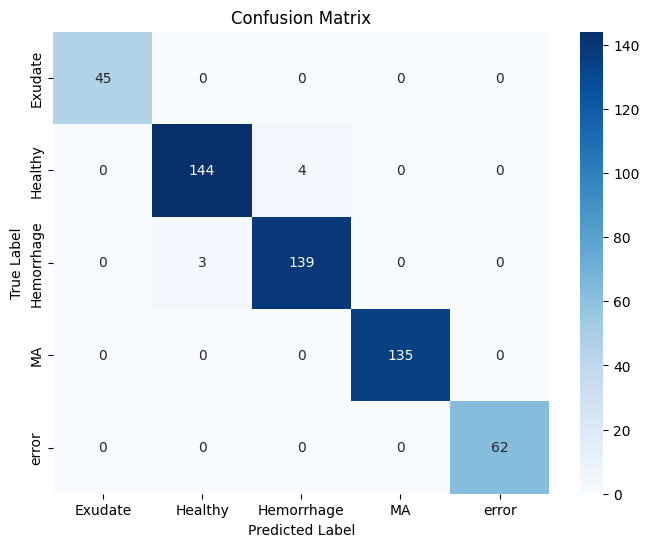

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      0.97      0.98       148
           2       0.97      0.98      0.98       142
           3       1.00      1.00      1.00       135
           4       1.00      1.00      1.00        62

    accuracy                           0.99       532
   macro avg       0.99      0.99      0.99       532
weighted avg       0.99      0.99      0.99       532

Test set accuracy:  0.9868421052631579


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

# Assuming y_test and y_pred are already defined

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Exudate', 'Healthy', 'Hemorrhage', 'MA','error'], yticklabels=['Exudate', 'Healthy', 'Hemorrhage', 'MA','error'])

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report and accuracy score
print(classification_report(y_test, y_pred))
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))
